In [4]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jul 19 10:08:31 2023

@author: SARP
"""

import numpy as np
import pandas as pd
#import shapely
#import sklearn.ensamble as RandomForestClassifier
import matplotlib.pyplot as plt 
import pysplit 
import glob

import os
import shutil

from joblib import dump, load

# from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.basemap import Basemap

In [5]:
# Specify the directory pattern with glob
file_paths = glob.glob("C:/Users/vwgei/Documents/PVOCAL/data/ALLTraj/*")
jail_path = "C:/Users/vwgei/Documents/PVOCAL/data/AllTraj_jail"

# Ensure the jail directory exists
os.makedirs(jail_path, exist_ok=True)

# Check for NAN/bad files
pattern = "********"  # Pattern to search for
matching_files = []

for file_path in file_paths:
    with open(file_path, 'r') as file:
        # Check if the pattern exists in any line of the file
        if any(pattern in line for line in file):
            matching_files.append(file_path)

# Move offending files to the jail_path
if matching_files:
    print("Files containing the pattern '********':")
    for match in matching_files:
        print(f"Moving {match} to jail...")
        shutil.move(match, jail_path)
    print("All offending files have been moved.")
else:
    print("No files contain the pattern '********'.")

Files containing the pattern '********':
Moving C:/Users/vwgei/Documents/PVOCAL/data/ALLTraj\PASTEL[15854]marautumn2006031016 to jail...
Moving C:/Users/vwgei/Documents/PVOCAL/data/ALLTraj\PASTEL[16771]aprautumn2006042620 to jail...
Moving C:/Users/vwgei/Documents/PVOCAL/data/ALLTraj\PASTEL[16772]aprautumn2006042620 to jail...
Moving C:/Users/vwgei/Documents/PVOCAL/data/ALLTraj\PASTEL[16773]aprautumn2006042620 to jail...
Moving C:/Users/vwgei/Documents/PVOCAL/data/ALLTraj\PASTEL[16774]aprautumn2006042620 to jail...
Moving C:/Users/vwgei/Documents/PVOCAL/data/ALLTraj\PASTEL[16775]aprautumn2006042621 to jail...
Moving C:/Users/vwgei/Documents/PVOCAL/data/ALLTraj\PASTEL[16776]aprautumn2006042621 to jail...
Moving C:/Users/vwgei/Documents/PVOCAL/data/ALLTraj\PASTEL[16777]aprautumn2006042621 to jail...
Moving C:/Users/vwgei/Documents/PVOCAL/data/ALLTraj\PASTEL[16778]aprautumn2006042621 to jail...
Moving C:/Users/vwgei/Documents/PVOCAL/data/ALLTraj\PASTEL[16779]aprautumn2006042621 to jail...

In [6]:
# Specify the directory pattern with glob
file_paths = glob.glob("C:/Users/vwgei/Documents/PVOCAL/data/ALLTraj/*")
jail_path = "C:/Users/vwgei/Documents/PVOCAL/data/AllTraj_jail"

# Ensure the jail directory exists
os.makedirs(jail_path, exist_ok=True)

# Check for NAN/bad files
pattern = "NaN"  # Pattern to search for
matching_files = []

for file_path in file_paths:
    with open(file_path, 'r') as file:
        # Check if the pattern exists in any line of the file
        if any(pattern in line for line in file):
            matching_files.append(file_path)

# Move offending files to the jail_path
if matching_files:
    print("Files containing the pattern 'NaN':")
    for match in matching_files:
        print(f"Moving {match} to jail...")
        shutil.move(match, jail_path)
    print("All offending files have been moved.")
else:
    print("No files contain the pattern 'NaN'.")

Files containing the pattern 'NaN':
Moving C:/Users/vwgei/Documents/PVOCAL/data/ALLTraj\PASTEL[25526]sepspring1996090101 to jail...
Moving C:/Users/vwgei/Documents/PVOCAL/data/ALLTraj\PASTEL[32413]octspring1991101305 to jail...
Moving C:/Users/vwgei/Documents/PVOCAL/data/ALLTraj\PASTEL[34052]marautumn1994030410 to jail...
Moving C:/Users/vwgei/Documents/PVOCAL/data/ALLTraj\PASTEL[34618]marautumn1994031307 to jail...
Moving C:/Users/vwgei/Documents/PVOCAL/data/ALLTraj\PASTEL[40332]sepspring1992090101 to jail...
All offending files have been moved.


In [7]:
trajgroup = pysplit.make_trajectorygroup("C:/Users/vwgei/Documents/PVOCAL/data/AllTraj/*")

PASTEL[44263]febwinter2001022414
PASTEL[44264]febwinter2001022415
PASTEL[44265]febwinter2001022415
PASTEL[44266]febwinter2001022415
PASTEL[44267]febwinter2001022415
PASTEL[44268]febwinter2001022415
PASTEL[44269]febwinter2001022415
PASTEL[44270]febwinter2001022415
PASTEL[44271]febwinter2001022415
PASTEL[44272]febwinter2001022416
PASTEL[44273]febwinter2001022416
PASTEL[44274]febwinter2001022416
PASTEL[44275]febwinter2001022416
PASTEL[44276]febwinter2001022416
PASTEL[44277]febwinter2001022416
PASTEL[44278]febwinter2001022417
PASTEL[44279]febwinter2001022417
PASTEL[44280]febwinter2001022417
PASTEL[44281]febwinter2001022417
PASTEL[44282]febwinter2001022417
PASTEL[44283]febwinter2001022417
PASTEL[44284]febwinter2001022417
PASTEL[44285]febwinter2001022418
PASTEL[44286]febwinter2001022418
PASTEL[44287]febwinter2001022418
PASTEL[44288]febwinter2001022418
PASTEL[44289]febwinter2001022418
PASTEL[44290]febwinter2001022418
PASTEL[44291]febwinter2001022418
PASTEL[44292]febwinter2001022419
PASTEL[442

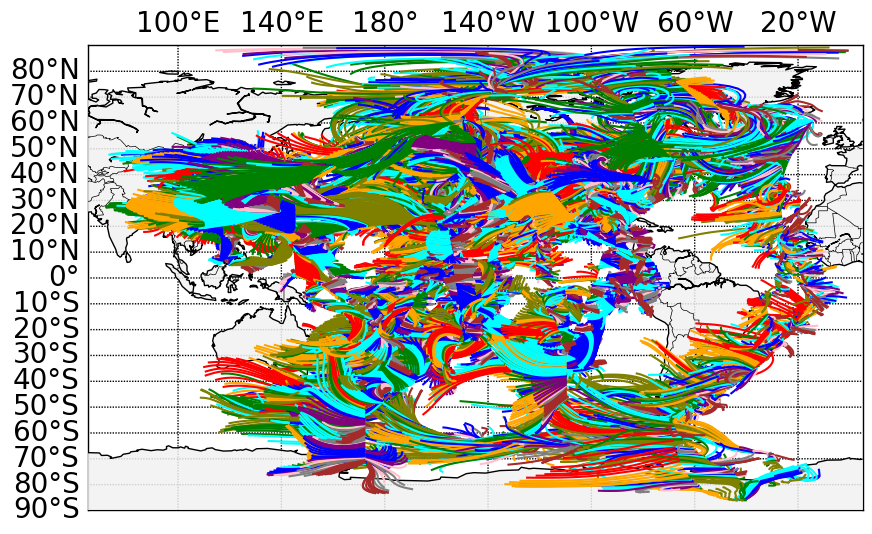

In [8]:
# Symbolize by trajectory endpoint altitude
def trajColorAlt(altitude):
    if(altitude > 11000): return 'red'
    if(altitude > 10000): return 'orange'
    if(altitude > 9000): return 'olive'
    if(altitude > 8000): return 'green'
    if(altitude > 6000): return 'cyan'
    if(altitude > 4000): return 'blue'
    if(altitude > 3000): return 'purple'
    if(altitude > 2000): return 'pink'
    if(altitude > 1000): return 'gray'
    if(altitude > 0): return 'brown'
    
def symbByMonth(month):
    if(month == 1): return 'maroon'
    if(month == 2): return 'red'
    if(month == 3): return 'coral'
    if(month == 4): return 'orange'
    if(month == 5): return 'gold'
    if(month == 6): return 'yellow'
    if(month == 7): return 'olive'
    if(month == 8): return 'green'
    if(month == 9): return 'cyan'
    if(month == 10): return 'blue'
    if(month == 11): return 'indigo'
    if(month == 12): return 'purple'

# #mapcorners = [-155, 20, -110, 52] #all extent

mapcorners = [-295, -90, 5, 90] #full globe
# mapcorners = [-200, -90, 280, 90] #reverse extent

standard_pm = None

bmap_params = pysplit.MapDesign(mapcorners, standard_pm)

bmap = bmap_params.make_basemap()

# # Remove parallels and meridians
# for line in bmap.ax.lines:
#     if line.get_label() == 'parallels' or line.get_label() == 'meridians':
#         line.remove()

# Longitude

# # Draw latitude and longitude grid lines
# bmap.drawparallels(range(-90, 91, 30), labels=[1,0,0,0], fontsize=10)  # Latitude lines
# bmap.drawmeridians(range(-180, 181, 45), labels=[0,0,0,1], fontsize=10)  

for traj in trajgroup:
    # print(f"On traj: {traj}")
    altitude0 = traj.data.geometry.apply(lambda p: p.z)[0]
    traj.trajcolor = trajColorAlt(altitude0) #uncomment to symbolize by altitude
    
    # month0 = traj.data.DateTime[0].month
    # traj.trajcolor = symbByMonth(month0)

    
for traj in trajgroup[:]:
    bmap.plot(*traj.path.xy, c=traj.trajcolor, latlon=True, zorder=20)